### Modelo para previsão do câncer em um paciente

Irei utilizar uma base de dados fornecida pelo kaggle [(link da base)](https://www.kaggle.com/datasets/ohinhaque/synthetic-cancer-prediction-dataset-for-research/data). Esta base de dados contém dados gerados sinteticamente, contendo 10000 pseudo-pacientes.

O propósito deste modelo é prever se um paciente pode ou não ter Cancer a partir das suas outras caracteristicas.

#### Dicionário de dados

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| Gender| 0 = 'Masculino'; 1 = 'Feminino' |0/1|
| Age| Idade do pseudo-paciente (18 a 100 anos) |inteiro|
| Smoking| 0 = 'Não fumante'; 1 = 'Fumante' |0/1|
| Fatigue| 0 = 'Sem fadiga'; 1 = 'Com fadiga' |0/1|
| Allergy| 0 = 'Sem Alergia'; 1 = 'Possui Alergia' |0/1|
| **Cancer**| 0 = 'Sem Cancer'; 1 = 'Possui Cancer' |0/1|

### Importando os pacotes necessários

In [59]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Carregando a base de dados

In [2]:
df = pd.read_csv('cancer_prediction_dataset.csv')

#### Verificando primeiras linhas do DataFrame

In [4]:
df.head()

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1


### Análise de dados

Através do df.info() é possível observar que temos 10000 linhas, que são os 10000 pseudo-pacientes, também vemos que não temos nenhum valor nulo nas variáveis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Gender   10000 non-null  int64
 1   Age      10000 non-null  int64
 2   Smoking  10000 non-null  int64
 3   Fatigue  10000 non-null  int64
 4   Allergy  10000 non-null  int64
 5   Cancer   10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


#### Verificando gráficamente a variável "target" Cancer

<Axes: xlabel='Cancer', ylabel='count'>

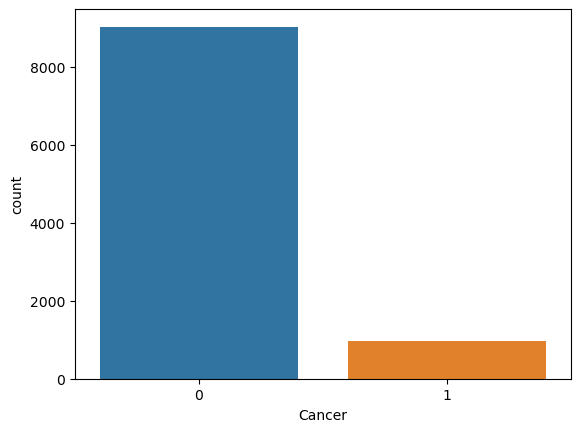

In [5]:
sns.countplot(x='Cancer', data=df)

#### Verificando a distribuição da idade dos pseudo-pacientes

<Axes: xlabel='Age', ylabel='count'>

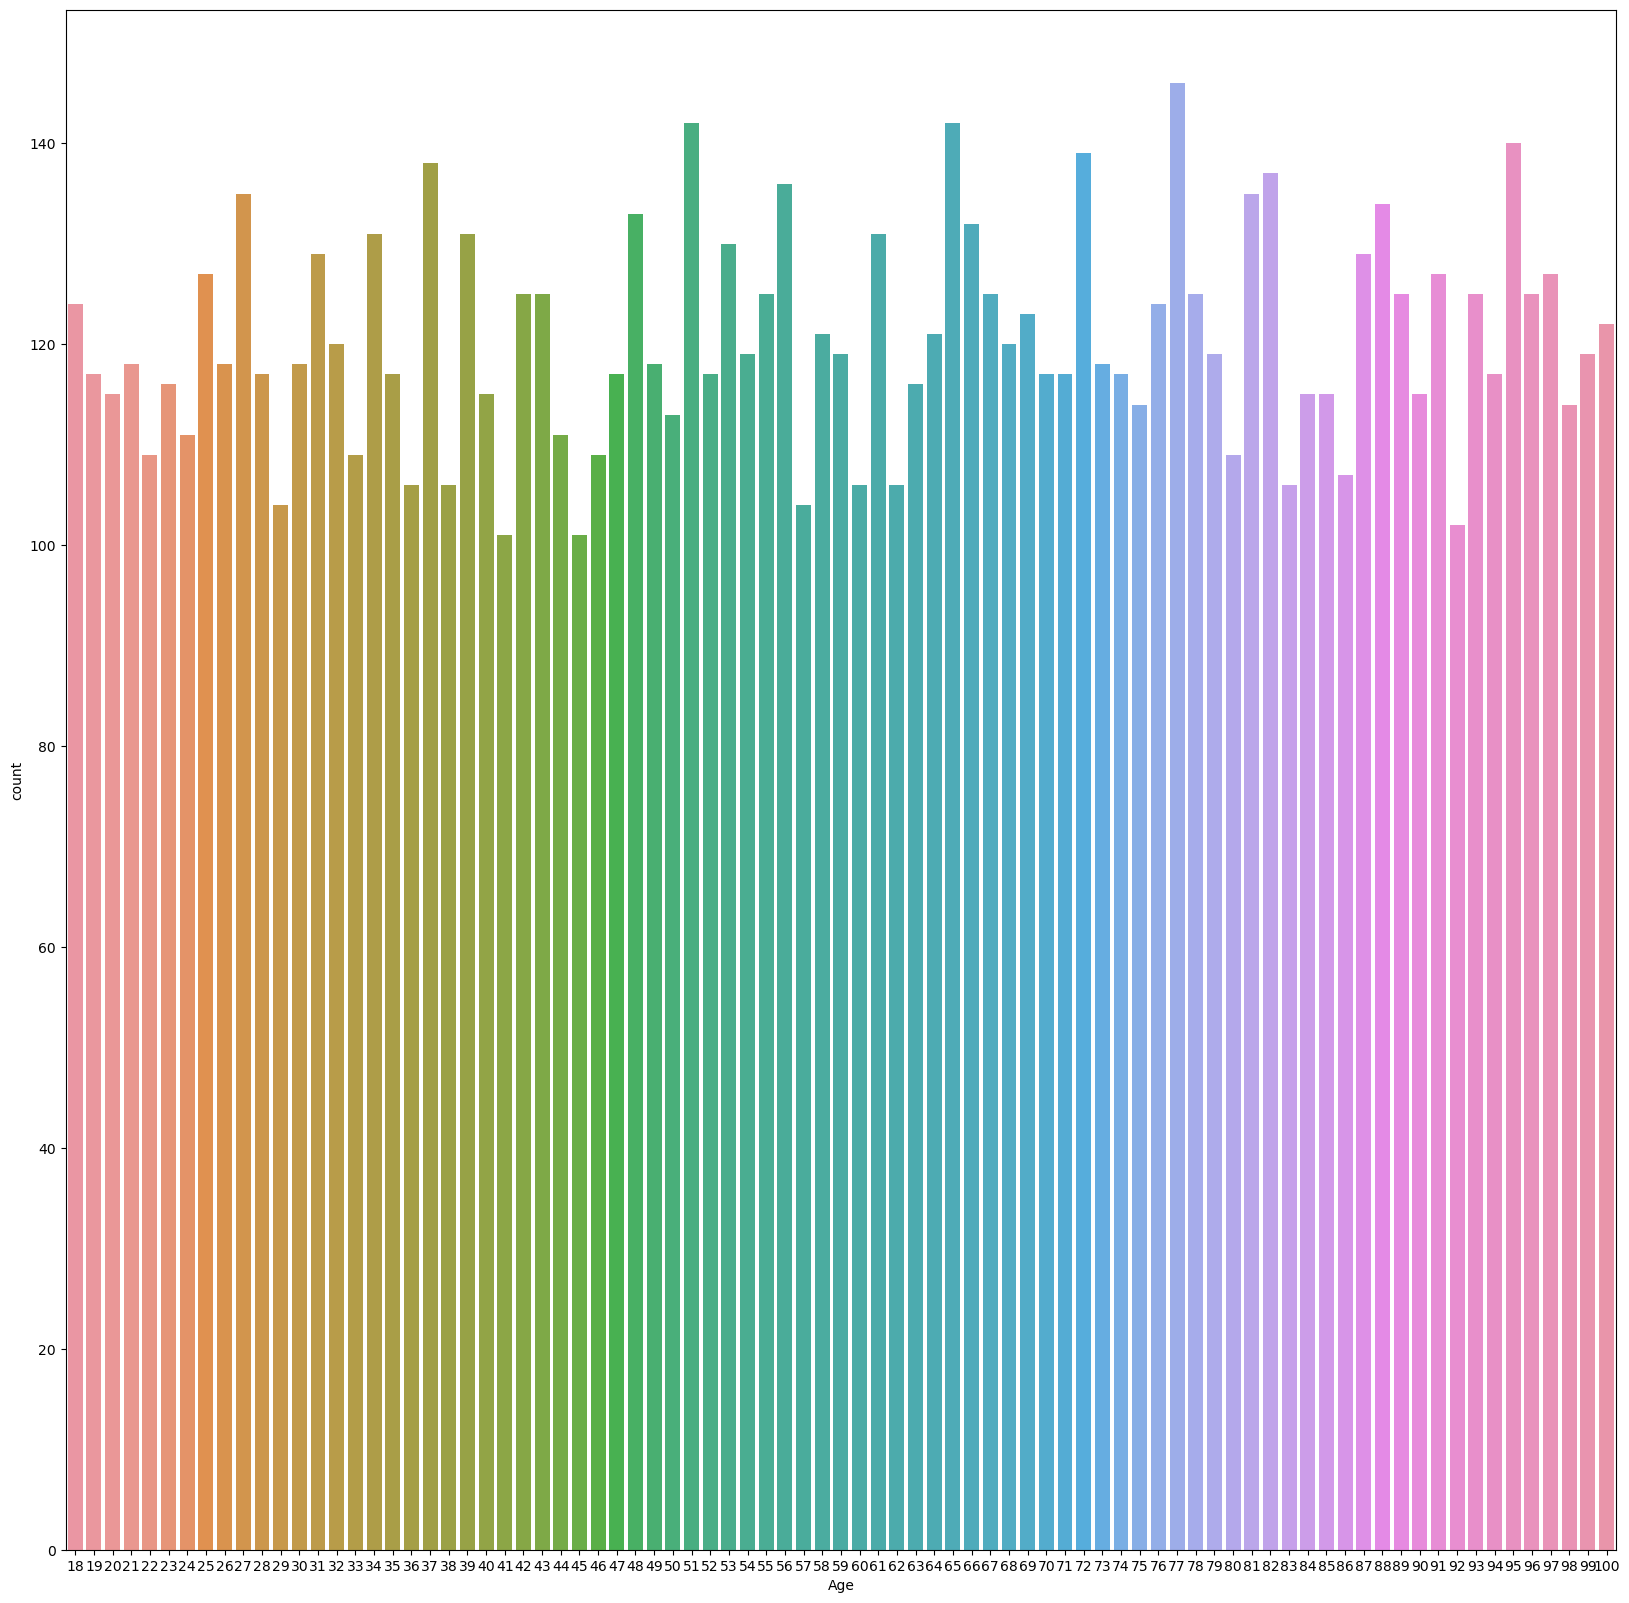

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='Age', data=df)

#### Verificando distribuição das variáveis restantes

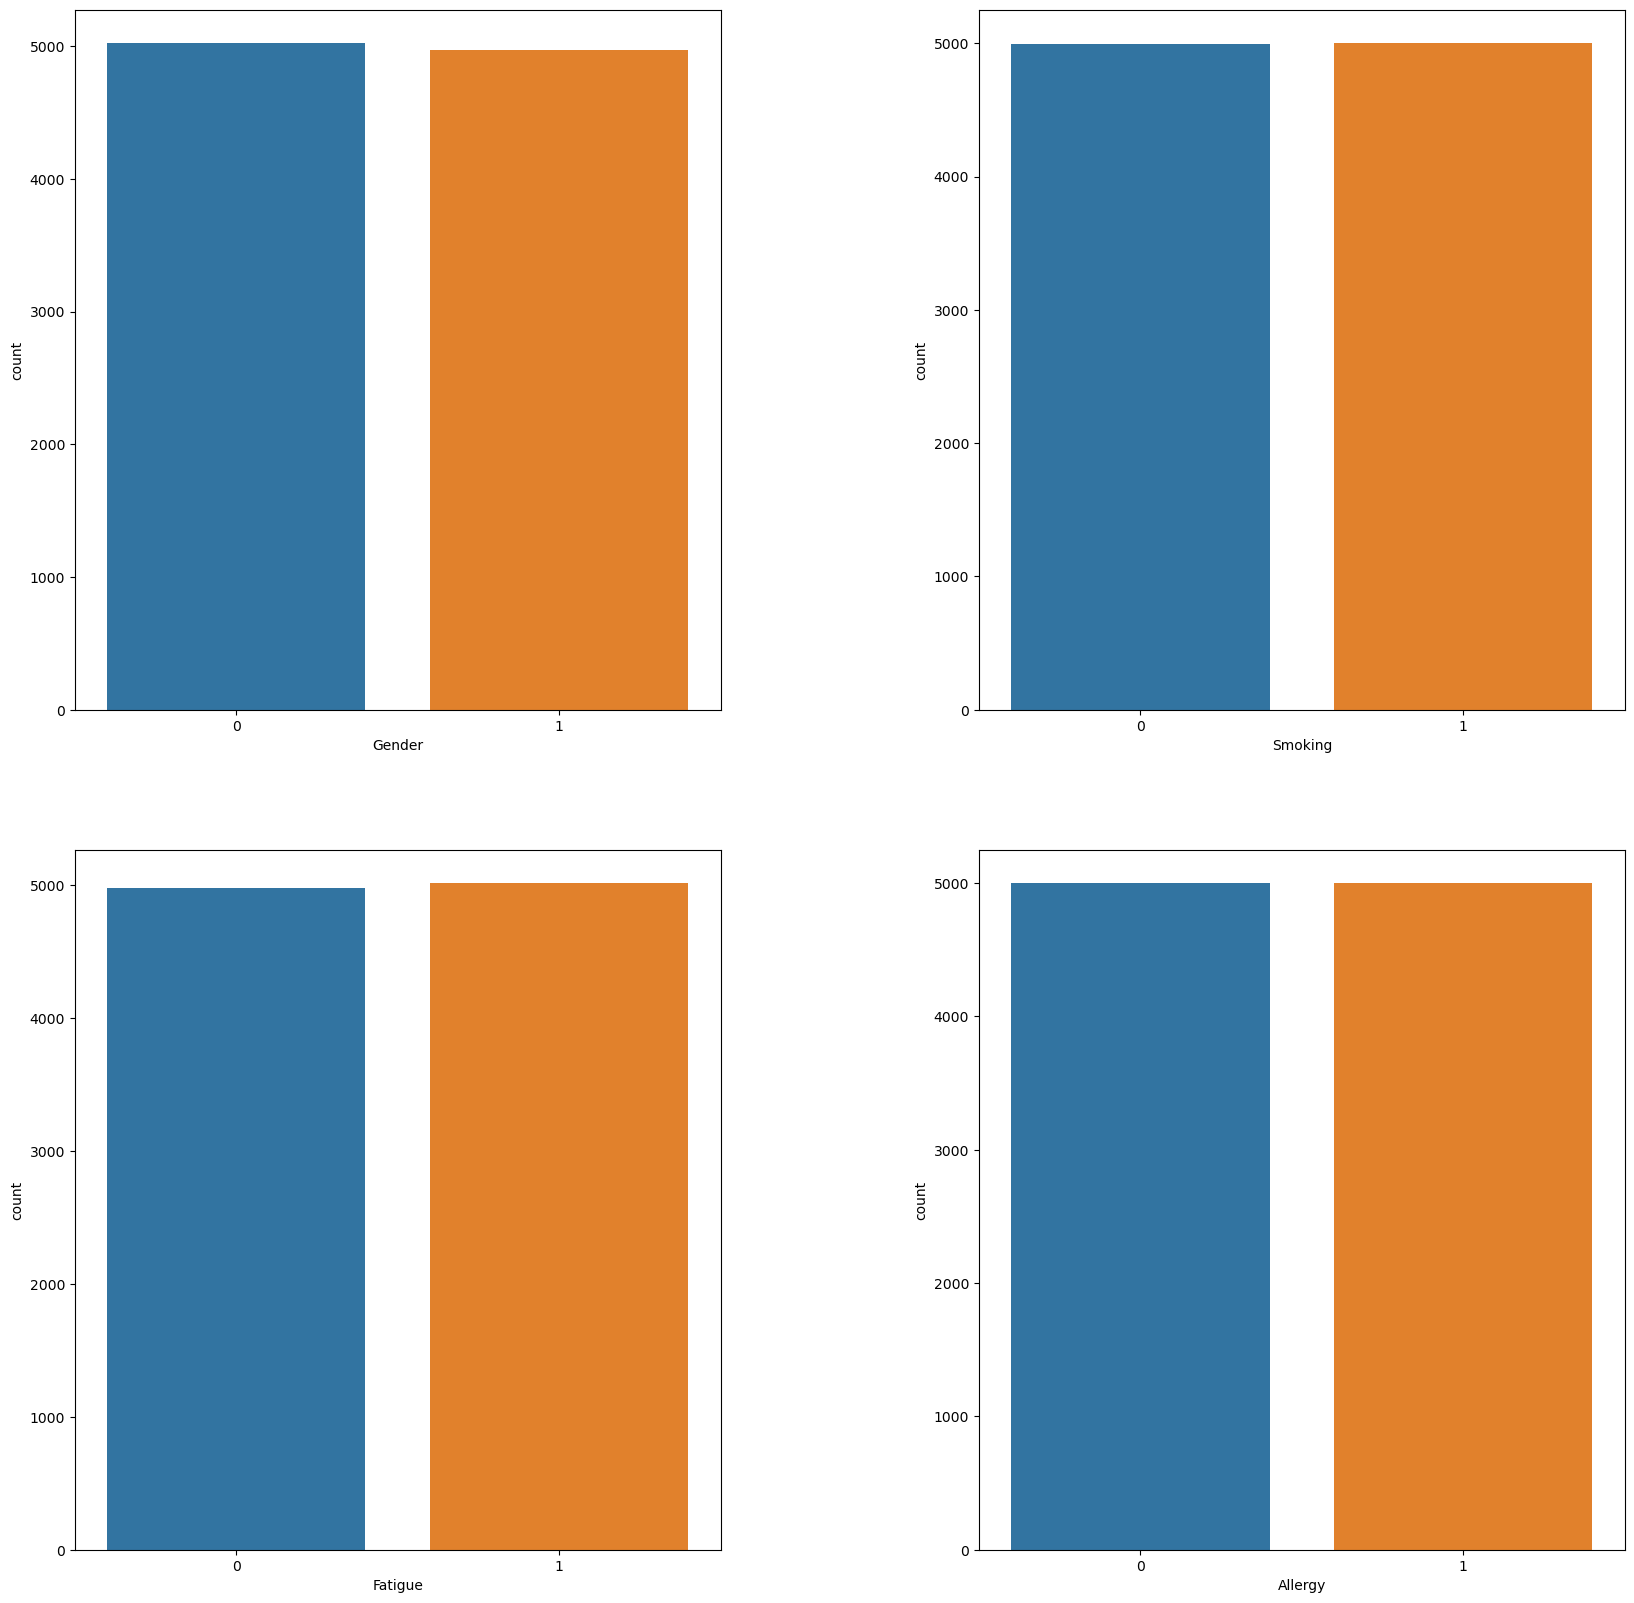

In [14]:
plt.close('all')
plt.rc('figure', figsize=(20, 20))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax= axes[0, 0], x='Gender', data=df)
sns.countplot(ax= axes[0, 1], x='Smoking', data=df)
sns.countplot(ax= axes[1, 0], x='Fatigue', data=df)
sns.countplot(ax= axes[1, 1], x='Allergy', data=df)


plt.subplots_adjust(wspace=0.4, hspace=0.2)

plt.show()

### Preparação da base para criação do modelo de machine learning

Primeiro modelo a ser testado será o Random Forest Classifier

In [16]:
X = df.drop('Cancer', axis=1)
y = df['Cancer']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#### Criando Árvore com n_estimators = 5

In [18]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

#### Verificando acurácia da árvore

In [19]:
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 88.48%


#### Matriz de confusão para verificar resultados

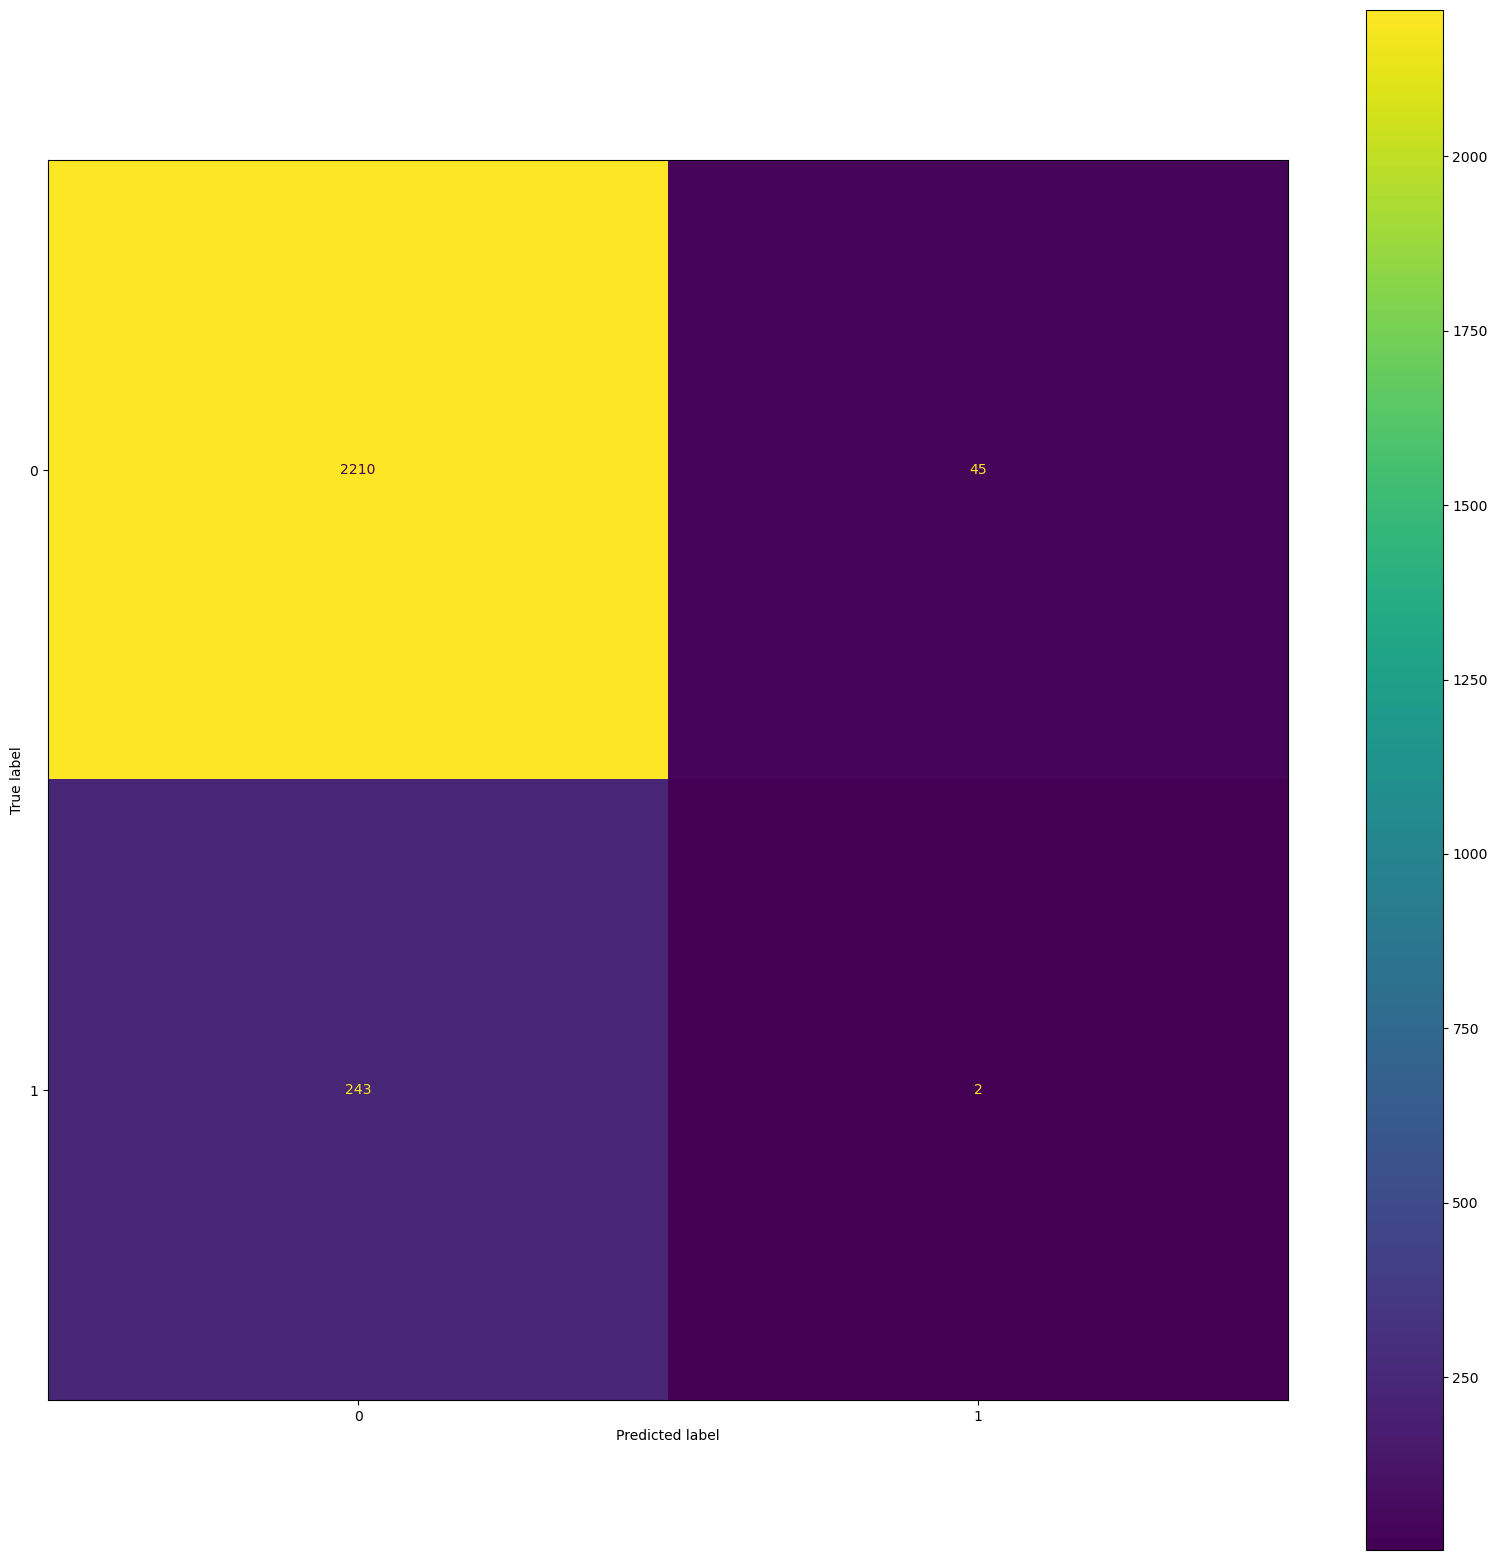

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()

### Testando outro valor para n_estimators

In [38]:
clf2 = RandomForestClassifier(n_estimators=12)
clf2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=12)

#### Acurácia subiu cerca de 1%

Realizei o teste com outros valores porém não houve grandes mudanças

In [39]:
y_pred = clf2.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 89.40%


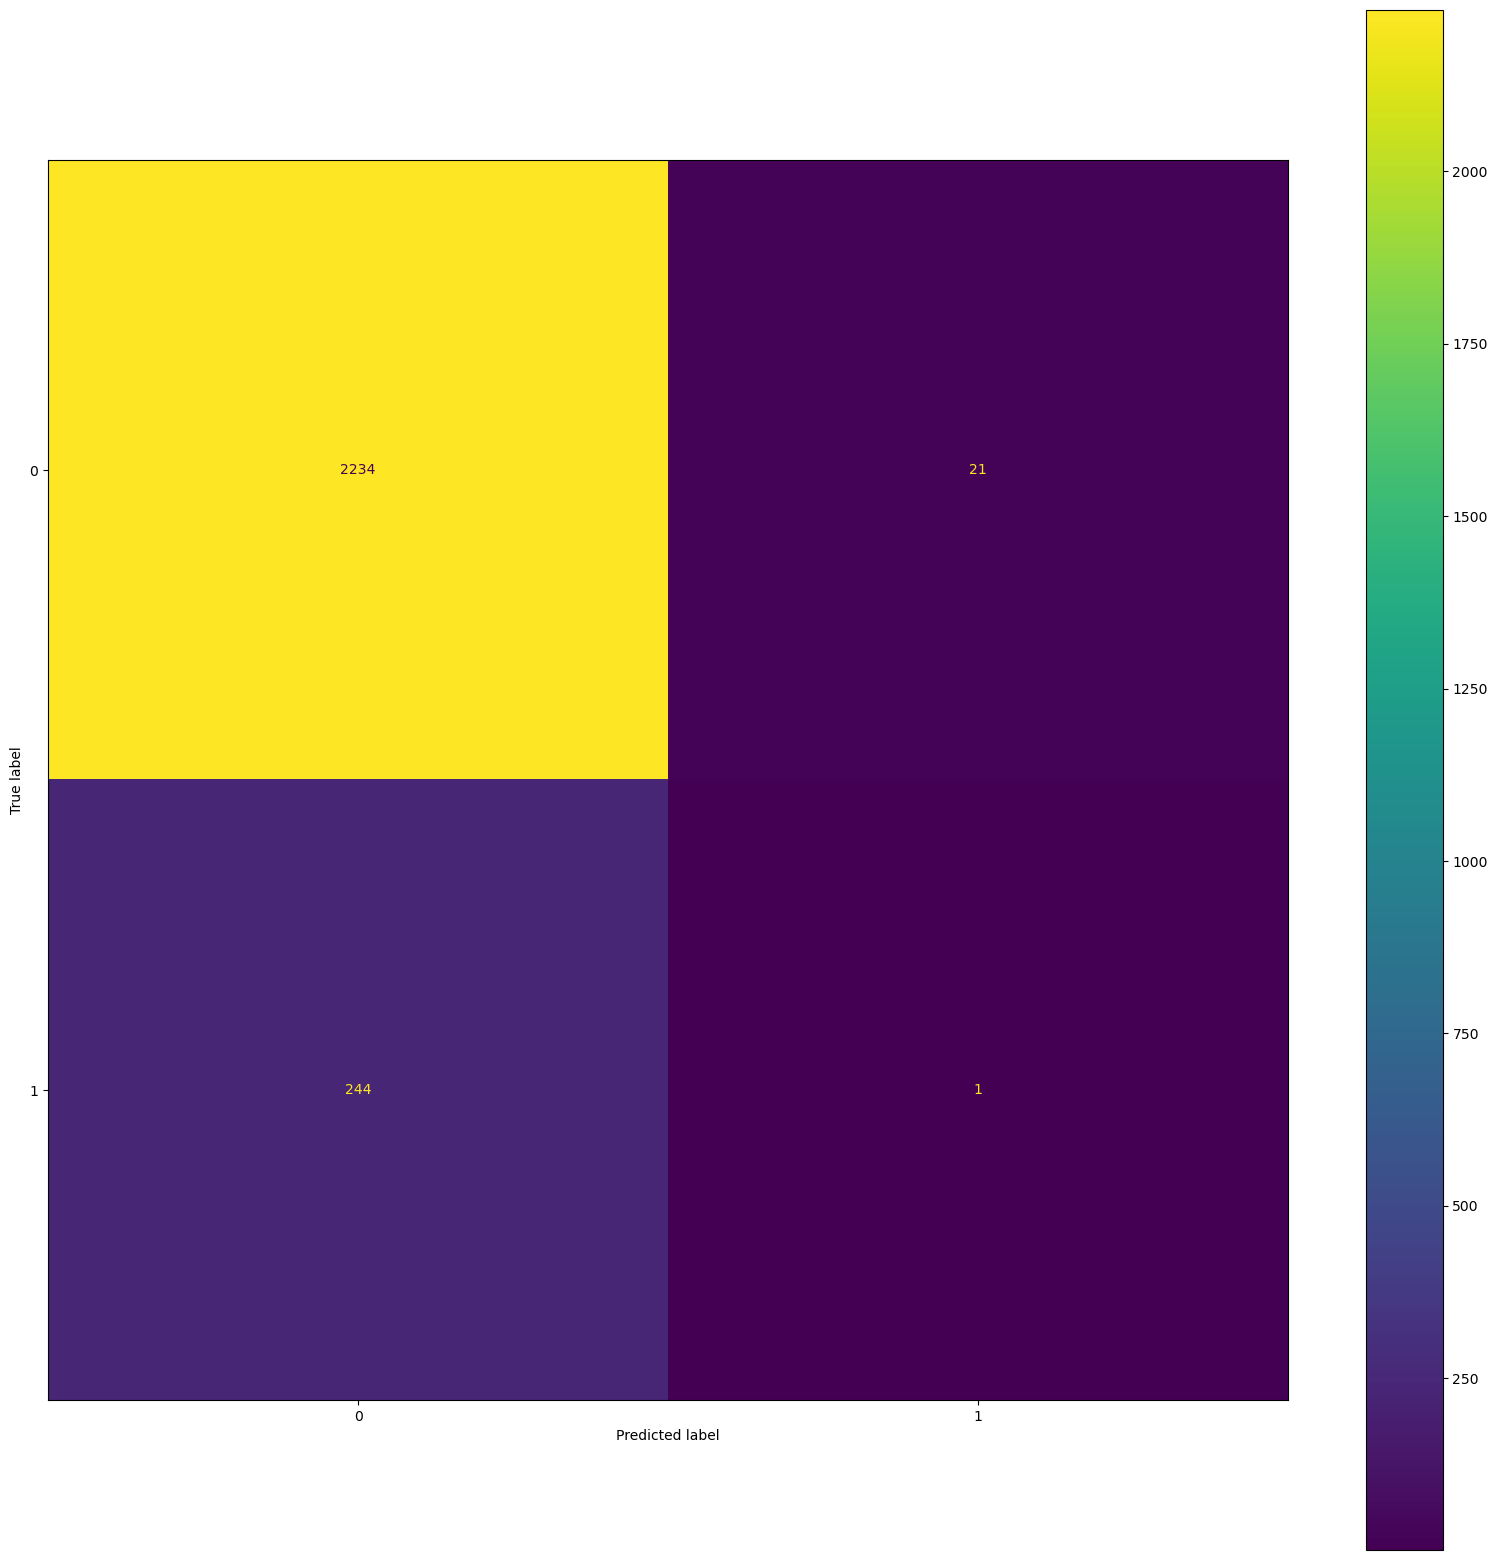

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()